# **Figure 3.** CPDD
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 03/31/2022          |
| Updated | 08/02/2022          |

,Run,⟨max(𝜌ₚ)⟩ / 𝜌₀,- 𝜎_max(𝜌ₚ) / 𝜌₀,+ 𝜎_max(𝜌ₚ) / 𝜌₀
0,AB/0.01,6.5e+01,-5.8e+01,+7.4e+01
1,AB/0.02,6.2e+01,-5.4e+01,+7.1e+01
2,AB/0.05,5.6e+01,-4.8e+01,+6.4e+01
3,AB/0.10,5.4e+01,-4.6e+01,+6.4e+01
4,BA/0.01,4.7e+02,-1.9e+02,+1.2e+03
5,BA/0.02,4.4e+02,-1.6e+02,+1.2e+03
6,BA/0.05,1.1e+02,-5.5e+01,+2.4e+02
7,BA/0.10,2.6e+01,-1.8e+01,+3.6e+01


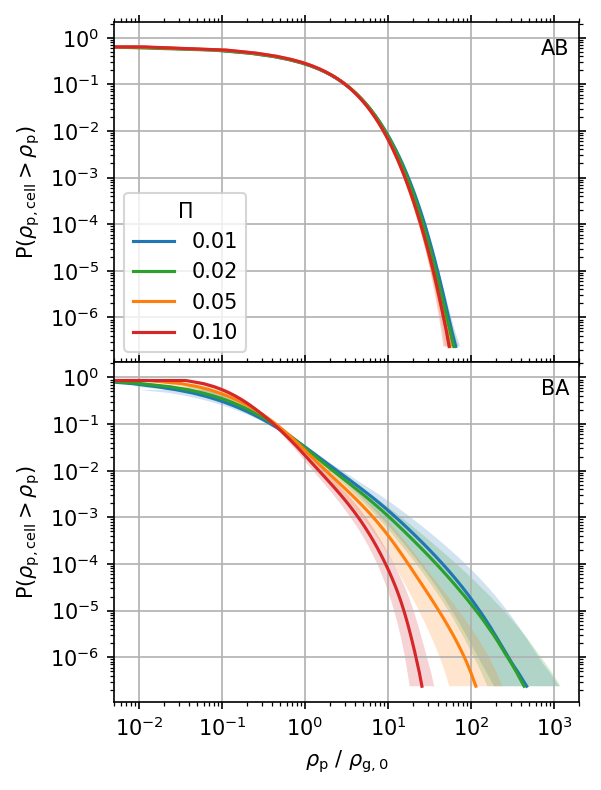

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4, 6), dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
epsilons = [1.0, 0.2]                                  # remove in final
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
indices = -np.unique(np.logspace(np.log2(int(res)**2), 0, num=100,
                     base=2, dtype=int))
runs, avg_maxs, merr_maxs, perr_maxs = [], [], [], []

for i, ax in enumerate(axs):
    for Pi in Pis:
        data = np.load(f'{workdir}/{cases[i]}/{Pi[0]}/{res}/output/cpdd.npz')
        take = np.take_along_axis(data['cdf'], indices, 0)
        cdf = np.flip(take)
        take = np.take_along_axis(data['avgs'], indices, 0)
        avgs = np.flip(take*epsilons[i])               # remove in final
        # avgs = np.flip(take)
        take = np.take_along_axis(data['stds'], indices, 0)
        stds = np.flip(take)
        
        runs.append(f'{cases[i]}/{Pi[0]}')
        avg_maxs.append(avgs[-1])
        merr_maxs.append(avgs[-1]/stds[-1])
        perr_maxs.append(avgs[-1]*stds[-1])
        ax.loglog(avgs, cdf, color=Pi[1], label=Pi[0])
        ax.fill_betweenx(cdf, avgs/stds, avgs*stds, color=Pi[1], ec=None,
                         alpha=0.2)

    ax.grid()
    ax.minorticks_on()
    ax.set(ylabel=r'P$(\rho_\mathrm{p,cell}>\rho_\mathrm{p})$')
    ax.text(0.98, 0.95, cases[i], ha='right', va='top', transform=ax.transAxes)
    ax.tick_params(which='both', top=True, right=True)

axs[0].legend(loc='lower left', title=r'$\Pi$')
ax.set(xlim=(5e-3, 2e3), xlabel=r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$')
plt.subplots_adjust(hspace=0)
# plt.savefig('figs/cpdd.pdf', bbox_inches='tight', pad_inches=0.01)

df = pd.DataFrame({
    'Run'              : runs,
    '⟨max(𝜌ₚ)⟩ / 𝜌₀'    : avg_maxs,
    '- 𝜎_max(𝜌ₚ) / 𝜌₀' : merr_maxs,
    '+ 𝜎_max(𝜌ₚ) / 𝜌₀' : perr_maxs})
df.style.format({
    '⟨max(𝜌ₚ)⟩ / 𝜌₀'    : '{:.1e}',
    '- 𝜎_max(𝜌ₚ) / 𝜌₀' : '-{:.1e}',
    '+ 𝜎_max(𝜌ₚ) / 𝜌₀' : '+{:.1e}'})